<a href="https://colab.research.google.com/github/BidexTech/HDSCFall23/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel('ENB2012_data.xlsx')

#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area',
                'X8': 'Glazing_Area_Distribution',
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df = df.rename(columns=column_names)

df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<Axes: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

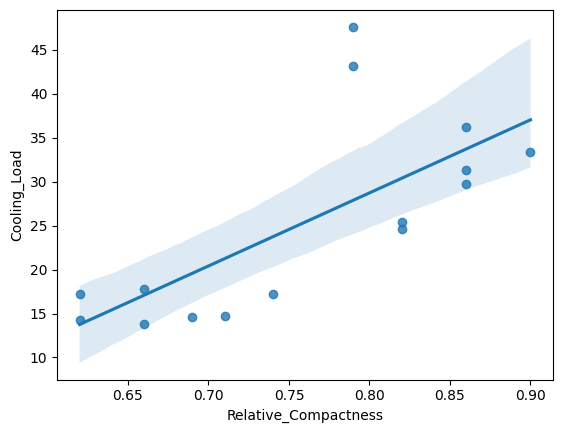

In [ ]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
            data=simple_linear_reg_df)

In [ ]:
#firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#Now we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#Obtain prediction
predicted_values = linear_model.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #print 0.063


0.063

In [ ]:
#Residual sum of sqaures (RSS) mean_squared_error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) #print 0.089

0.089

In [ ]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) #prints 0.893

0.894

In [ ]:
#Regression Techniques
#Ridge Regression or L2 Regularisation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5)

In [ ]:
#lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha =0.001)
lasso_reg.fit(x_train, y_train)



Lasso(alpha=0.001)

In [ ]:
#comparing the effect of regularisation
def get_weights_df(model, feat, col_name):
  #this function return the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns =['Feature', col_name]
  weights_df[col_name].round(3)
  return weights_df

  linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
  ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_weight')
  lasso_weights_df = get_weights_df(lass0_reg, x_train, 'Lasso_Weight')

  final_weights = pd.merge(linear_model_weights, ridge_weights_df, om='Features')
  final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
